#  Reference template based classifier 
## Case 2: Mean vector and covariance matrix as reference template for a class

Validation Accuracy: 0.20
Test Accuracy: 0.20


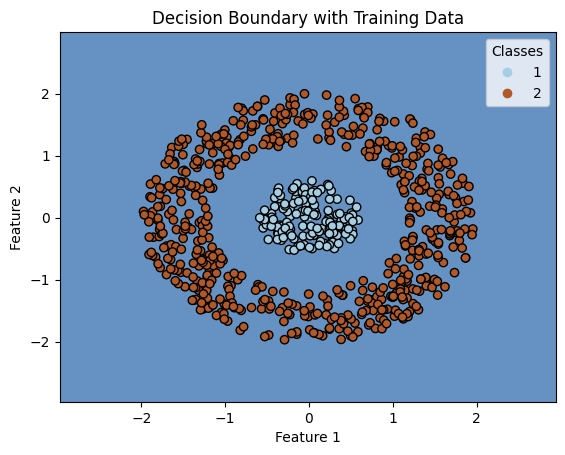

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load data (you will need to adjust file paths as necessary)
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # 2D features
    y = data[:, -1]   # class labels
    return X, y

# Calculate mean vector and covariance matrix
def calculate_template(X):
    mean_vector = np.mean(X, axis=0)
    covariance_matrix = np.cov(X.T)
    return mean_vector, covariance_matrix

# Mahalanobis distance calculation
def mahalanobis_distance(x, mean, covariance_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff.T, covariance_inv), diff))

# Classify using reference templates
def classify(X, templates):
    predictions = []
    for x in X:
        distances = []
        for mean, covariance_inv in templates:
            distance = mahalanobis_distance(x, mean, covariance_inv)
            distances.append(distance)
        predictions.append(np.argmin(distances))  # class with minimum distance
    return np.array(predictions)

# Load train, validation, and test data
X_train, y_train = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
X_val, y_val = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt")
X_test, y_test = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")


# Calculate reference templates (mean and covariance matrix for each class)
templates = []
for label in np.unique(y_train):
    X_class = X_train[y_train == label]
    mean, covariance_matrix = calculate_template(X_class)
    covariance_inv = np.linalg.inv(covariance_matrix)
    templates.append((mean, covariance_inv))

# Classification on validation data for performance evaluation
y_val_pred = classify(X_val, templates)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification on test data
y_test_pred = classify(X_test, templates)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plotting the decision region with training data superimposed
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a grid of points to classify
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = classify(grid_points, templates)
grid_predictions = grid_predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=0.8, cmap=plt.cm.Spectral)
# Plot training data
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, marker='o', label='Train Data')

# Add color legend
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('Decision Boundary with Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [30]:
import numpy as np

# Function to load data from txt files
def load_data(file_path):
    data = np.loadtxt(file_path)
    features = data[:, :2]  # First two columns are features
    labels = data[:, 2].astype(int)  # Third column is class labels
    return features, labels

# Function to compute the mean vector and covariance matrix for each class
def compute_reference_templates(features, labels, class_labels):
    templates = {}
    for c in class_labels:
        class_features = features[labels == c]
        mean_vector = np.mean(class_features, axis=0)
        covariance_matrix = np.cov(class_features, rowvar=False)
        templates[c] = (mean_vector, covariance_matrix)
    return templates

def mahalanobis_distance(x, mean, covariance_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, covariance_inv), diff.T))

def classify(x, templates):
    distances = []
    for c, (mean, cov_matrix) in templates.items():
        cov_inv = np.linalg.inv(cov_matrix)
        distance = mahalanobis_distance(x, mean, cov_inv)
        distances.append(distance)
    return min([(dist, c) for dist, c in zip(distances, templates.keys())])[1]

train_features, train_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
test_features, test_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

class_labels = [1, 2] 
templates = compute_reference_templates(train_features, train_labels, class_labels)

predictions = [classify(x, templates) for x in test_features]

accuracy = np.sum(predictions == test_labels) / len(test_labels)
print(f"Accuracy: {accuracy:.2f}")
print(predictions)
print(f"Class 1 count in training set: {np.sum(train_labels == 1)}")
print(f"Class 2 count in training set: {np.sum(train_labels == 2)}")

Accuracy: 0.80
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Class 1 count in training set: 150
Class 2 count in training set: 600


In [31]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import cdist

# Load data (assuming 'load_data' function returns the features and labels)
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # Features (first two columns)
    y = data[:, -1]   # Class labels (third column)
    return X, y

# Function to calculate the mean vector and covariance matrix for each class
def calculate_reference_templates(X, y, num_classes):
    means = []
    covariances = []
    for i in range(1, num_classes + 1):
        class_data = X[y == i]
        means.append(np.mean(class_data, axis=0))
        covariances.append(np.cov(class_data.T))  # Covariance matrix (data.T for transpose)
    return np.array(means), np.array(covariances)

# Mahalanobis Distance Classifier
def classify_with_mahalanobis(X, means, covariances):
    # Calculate Mahalanobis distance for each class
    dist = []
    for i in range(len(means)):
        cov_inv = np.linalg.inv(covariances[i])  # Inverse of covariance matrix
        diff = X - means[i]  # Difference from mean vector
        mahalanobis_dist = np.diag(np.dot(np.dot(diff, cov_inv), diff.T))  # Mahalanobis distance
        dist.append(mahalanobis_dist)
    
    dist = np.array(dist).T  # Transpose to get the right shape
    return np.argmin(dist, axis=1) + 1  # Return the class with the minimum distance

# Load datasets
train_features, train_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
val_features, val_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt")
test_features, test_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Calculate mean vectors and covariance matrices for training data
num_classes = 2  # We have two classes: 1 and 2
means, covariances = calculate_reference_templates(train_features, train_labels, num_classes)

# Evaluate on validation set
val_predictions = classify_with_mahalanobis(val_features, means, covariances)
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Classification Report:\n", classification_report(val_labels, val_predictions))

# Evaluate on test set after validation
test_predictions = classify_with_mahalanobis(test_features, means, covariances)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:\n", classification_report(test_labels, test_predictions))


Validation Accuracy: 0.80
Validation Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.01      0.02        90
         2.0       0.80      1.00      0.89       360

    accuracy                           0.80       450
   macro avg       0.90      0.51      0.46       450
weighted avg       0.84      0.80      0.72       450

Test Accuracy: 0.80
Test Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        60
         2.0       0.80      1.00      0.89       240

    accuracy                           0.80       300
   macro avg       0.40      0.50      0.44       300
weighted avg       0.64      0.80      0.71       300



c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [32]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from scipy.spatial.distance import cdist

# Load data (assuming 'load_data' function returns the features and labels)
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # Features (first two columns)
    y = data[:, -1]   # Class labels (third column)
    return X, y

# Function to calculate the mean vector and covariance matrix for each class
def calculate_reference_templates(X, y, num_classes):
    means = []
    covariances = []
    for i in range(1, num_classes + 1):
        class_data = X[y == i]
        means.append(np.mean(class_data, axis=0))
        covariances.append(np.cov(class_data.T))  # Covariance matrix (data.T for transpose)
    return np.array(means), np.array(covariances)

# Mahalanobis Distance Classifier
def classify_with_mahalanobis(X, means, covariances):
    # Calculate Mahalanobis distance for each class
    dist = []
    for i in range(len(means)):
        cov_inv = np.linalg.inv(covariances[i])  # Inverse of covariance matrix
        diff = X - means[i]  # Difference from mean vector
        mahalanobis_dist = np.diag(np.dot(np.dot(diff, cov_inv), diff.T))  # Mahalanobis distance
        dist.append(mahalanobis_dist)
    
    dist = np.array(dist).T  # Transpose to get the right shape
    return np.argmin(dist, axis=1) + 1  # Return the class with the minimum distance

# Load datasets
train_features, train_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
val_features, val_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt")
test_features, test_labels = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Calculate mean vectors and covariance matrices for training data
num_classes = 2  # We have two classes: 1 and 2
means, covariances = calculate_reference_templates(train_features, train_labels, num_classes)

# Evaluate on validation set
val_predictions = classify_with_mahalanobis(val_features, means, covariances)
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Classification Report:\n", classification_report(val_labels, val_predictions))

# Evaluate on test set after validation
test_predictions = classify_with_mahalanobis(test_features, means, covariances)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:\n", classification_report(test_labels, test_predictions))


Validation Accuracy: 0.80
Validation Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      0.01      0.02        90
         2.0       0.80      1.00      0.89       360

    accuracy                           0.80       450
   macro avg       0.90      0.51      0.46       450
weighted avg       0.84      0.80      0.72       450

Test Accuracy: 0.80
Test Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        60
         2.0       0.80      1.00      0.89       240

    accuracy                           0.80       300
   macro avg       0.40      0.50      0.44       300
weighted avg       0.64      0.80      0.71       300



c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### Decision region plot for all the classes together with the training data superposed 

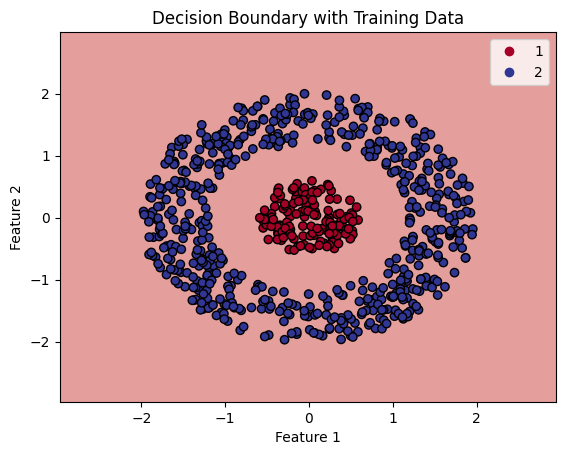

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load data from txt files
def load_data(file_path):
    data = np.loadtxt(file_path)
    features = data[:, :2]  # First two columns are features
    labels = data[:, 2].astype(int)  # Third column is class labels
    return features, labels

# Function to compute the mean vector and covariance matrix for each class
def compute_reference_templates(features, labels, class_labels):
    templates = {}
    for c in class_labels:
        class_features = features[labels == c]
        mean_vector = np.mean(class_features, axis=0)
        covariance_matrix = np.cov(class_features, rowvar=False)
        templates[c] = (mean_vector, covariance_matrix)
    return templates

# Function to compute Mahalanobis distance
def mahalanobis_distance(x, mean, covariance_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, covariance_inv), diff.T))

# Function to classify a new sample
def classify(x, templates):
    distances = []
    for c, (mean, cov_matrix) in templates.items():
        cov_inv = np.linalg.inv(cov_matrix)
        distance = mahalanobis_distance(x, mean, cov_inv)
        distances.append(distance)
    return min([(dist, c) for dist, c in zip(distances, templates.keys())])[1]

# Function to plot decision regions and training data
def plot_decision_regions(features, labels, templates, resolution=0.02):
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    Z = np.array([classify(np.array([x, y]), templates) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')

    # Plot the training points
    scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.RdYlBu, edgecolor='k', marker='o')
    plt.legend(handles=scatter.legend_elements()[0], labels=[1, 2])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary with Training Data')
    plt.show()


# Compute reference templates (mean and covariance) for each class
class_labels = [1, 2]  # Define the class labels (1 and 2)
templates = compute_reference_templates(train_features, train_labels, class_labels)

# Plot the decision regions with the training data
plot_decision_regions(train_features, train_labels, templates)


### Decision region plot for all the classes together with the testing data superposed 

### Evaluation metrics

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Function to evaluate classifier performance
def evaluate_classifier(test_features, test_labels, templates):
    # Get predictions
    predictions = [classify(x, templates) for x in test_features]
    
    # Classification accuracy
    accuracy = accuracy_score(test_labels, predictions)
    
    # Precision, recall, F1-score for each class
    precision = precision_score(test_labels, predictions, average=None, labels=[1, 2])
    recall = recall_score(test_labels, predictions, average=None, labels=[1, 2])
    f1 = f1_score(test_labels, predictions, average=None, labels=[1, 2])

    # Mean precision, recall, and F1-score
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_f1 = np.mean(f1)
    
    return accuracy, precision, recall, f1, mean_precision, mean_recall, mean_f1


# Evaluate the classifier on the test data
accuracy, precision, recall, f1, mean_precision, mean_recall, mean_f1 = evaluate_classifier(
    test_features, test_labels, templates
)

# Print the evaluation results
print(f"Classification Accuracy: {accuracy:.2f}")
print(f"Precision for Class 1: {precision[0]:.2f}, Precision for Class 2: {precision[1]:.2f}")
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Recall for Class 1: {recall[0]:.2f}, Recall for Class 2: {recall[1]:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"F-measure for Class 1: {f1[0]:.2f}, F-measure for Class 2: {f1[1]:.2f}")
print(f"Mean F-measure: {mean_f1:.2f}")

Classification Accuracy: 0.80
Precision for Class 1: 0.00, Precision for Class 2: 0.80
Mean Precision: 0.40
Recall for Class 1: 0.00, Recall for Class 2: 1.00
Mean Recall: 0.50
F-measure for Class 1: 0.00, F-measure for Class 2: 0.89
Mean F-measure: 0.44


c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  0  60]
 [  0 240]]
